In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [3]:
import spacy  # For preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [4]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import spacy
import multiprocessing
from gensim.models.phrases import Phrases, Phraser
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from gensim.models import Word2Vec


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
#Importing dataset
from sklearn.datasets import fetch_20newsgroups

In [6]:
#Reading the 20Newsgroup dataset 
df = fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'),shuffle=True, random_state=102)

In [7]:
df.filenames.shape

(18846,)

In [8]:
#No of labels
labels = df.target
n=len(np.unique(labels))
n

20

In [9]:
#An example of data
df.data[1]

"Software that comes together with the VideoBlaster\nis designed to work together with the SoundBlaster\n(from the same manufacturer).\n\nSince I do not own a SoundBlaster: is there a possibility\nto use the PC Speaker driver to play audio files for\nthe VideoBlaster (.AVI = audio video interleave files) ?\n\nI think what I should have is a device driver for\nthe Media Player that controls the PC Speaker Driver\ninstead of the SoundBlaster card (something like MCISPKR.DRV).\n\nHas anybody heard of such a driver?\nOr am I on the wrong track?\n\nAny information on this appreciated!\n\n(Please send e-mail, since I don't watch this group regularly.)\n"

In [10]:
#TF IDF
vectorizer = TfidfVectorizer(stop_words='english')

In [11]:
features = vectorizer.fit_transform(df.data)

In [12]:
features.shape

(18846, 134101)

In [ ]:
#reduced_data = PCA(n_components=2,random_state=0).fit_transform(features.toarray())

In [13]:
# Finding optimum number of clusters
ssd = []
K = range(1,21)
for k in K:
    km = KMeans(n_clusters=k,init='k-means++',max_iter=50)
    km = km.fit(features)#K means clustering
    ssd.append(km.inertia_)

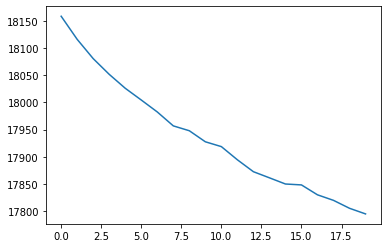

In [14]:
plt.plot(ssd)

In [15]:
#K means clustering for 20 clusters
kmeans = KMeans(n_clusters=20,init='k-means++',max_iter=50)
kmeans.fit(features)

KMeans(max_iter=50, n_clusters=20)

In [24]:
#Clusters centroids
centroids = kmeans.cluster_centers_.argsort()[:, ::-1] ## Indices of largest centroids' entries in descending order
terms = vectorizer.get_feature_names()
for i in range(20):
    print("Cluster %d:" % i, end='')
    for ind in centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: god jesus christ bible believe faith sin christians christian people
Cluster 1: drive scsi ide drives hard disk controller floppy cd hd
Cluster 2: israel jews armenian israeli armenians arab turkish jewish arabs people
Cluster 3: card monitor video bus board cards apple vga ram motherboard
Cluster 4: car cars engine miles dealer oil good new ford like
Cluster 5: just like don ve think space bike good time use
Cluster 6: people don think government right gun just like say know
Cluster 7: 00 10 ax 11 25 15 20 50 12 13
Cluster 8: key encryption chip clipper keys escrow government algorithm des phone
Cluster 9: windows dos ms file os files run running program use
Cluster 10: edu com think like use time does new used don
Cluster 11: sale offer shipping condition price asking new sell interested email
Cluster 12: deleted stuff turkey truelove leftover served christmas day just like
Cluster 13: dsl n3jxp cadre chastity geb intellect skepticism shameful pitt surrender
Cluster 14: th